In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [59]:
df = pd.read_csv('d:insurance.csv')

In [60]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [61]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [62]:
df['sex'].replace({'female':1,'male':0},inplace=True)

In [63]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [64]:
df['bmi']=df['bmi'] / 100

In [65]:
df['smoker'].replace({'yes':1,'no':0},inplace=True)

In [66]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

In [67]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,0.27900,0,1,southwest,16884.92400
1,18,0,0.33770,1,0,southeast,1725.55230
2,28,0,0.33000,3,0,southeast,4449.46200
3,33,0,0.22705,0,0,northwest,21984.47061
4,32,0,0.28880,0,0,northwest,3866.85520


In [68]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [69]:
df.shape

(1338, 7)

Text(0.5, 1.0, 'region vs charges')

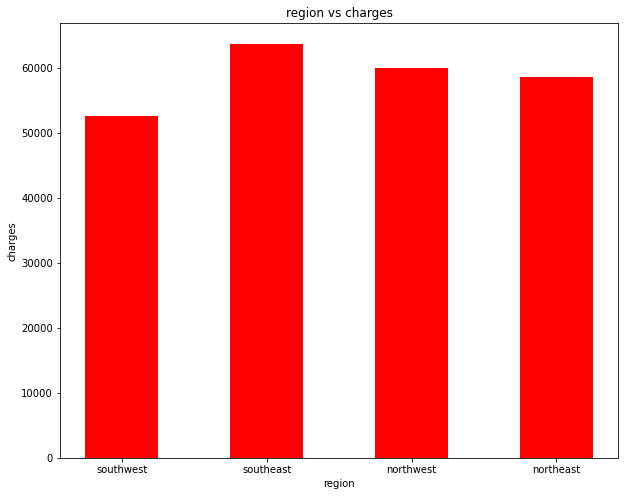

In [70]:
plt.figure(figsize=(10,8))
plt.bar(df['region'],df['charges'] , color='red' , width=0.5)
plt.xlabel('region')
plt.ylabel('charges')
plt.title('region vs charges')

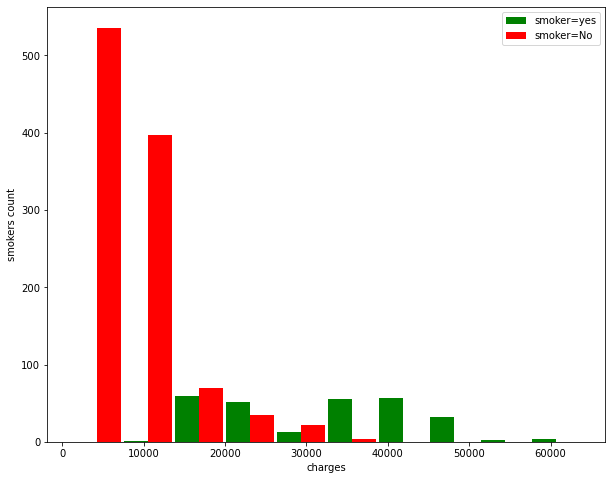

In [71]:
smoker_no = df[df.smoker==0].charges
smoker_yes = df[df.smoker==1].charges

plt.figure(figsize=(10,8))
plt.xlabel('charges')
plt.ylabel('smokers count')
plt.hist([smoker_yes,smoker_no], rwidth=0.95, color=['green','red'],label=['smoker=yes','smoker=No'])
plt.legend()

In [72]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,0.27900,0,1,southwest,16884.92400
1,18,0,0.33770,1,0,southeast,1725.55230
2,28,0,0.33000,3,0,southeast,4449.46200
3,33,0,0.22705,0,0,northwest,21984.47061
4,32,0,0.28880,0,0,northwest,3866.85520


In [73]:
df2 = pd.get_dummies(data=df,columns=['region'] , drop_first=True)

In [74]:
df2

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,0.27900,0,1,16884.92400,0,0,1
1,18,0,0.33770,1,0,1725.55230,0,1,0
2,28,0,0.33000,3,0,4449.46200,0,1,0
3,33,0,0.22705,0,0,21984.47061,1,0,0
4,32,0,0.28880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,0.30970,3,0,10600.54830,1,0,0
1334,18,1,0.31920,0,0,2205.98080,0,0,0
1335,18,1,0.36850,0,0,1629.83350,0,1,0
1336,21,1,0.25800,0,0,2007.94500,0,0,1


In [75]:
df2.dtypes

age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [76]:
df2['age'] = df2['age'] / 100

In [77]:
df2

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,0.19,1,0.27900,0,1,16884.92400,0,0,1
1,0.18,0,0.33770,1,0,1725.55230,0,1,0
2,0.28,0,0.33000,3,0,4449.46200,0,1,0
3,0.33,0,0.22705,0,0,21984.47061,1,0,0
4,0.32,0,0.28880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.50,0,0.30970,3,0,10600.54830,1,0,0
1334,0.18,1,0.31920,0,0,2205.98080,0,0,0
1335,0.18,1,0.36850,0,0,1629.83350,0,1,0
1336,0.21,1,0.25800,0,0,2007.94500,0,0,1


In [78]:
x=df2.drop(['charges'],axis='columns')
y=df2['charges']

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42 , test_size=0.2)

In [80]:
x_train.shape

(1070, 8)

In [81]:
import tensorflow as tf
from tensorflow import keras


In [82]:
model = keras.Sequential([
    keras.layers.Dense(6,input_shape=(8,),activation='relu'),
    keras.layers.Dense(3,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [85]:
model.compile(optimizer='SGD' , loss='mae' , metrics=['mse'])

In [87]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 13345.1357 - mse: 322425856.0000
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.1309 - mse: 322425728.0000
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.1240 - mse: 322425632.0000
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.1191 - mse: 322425600.0000
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.1152 - mse: 322425440.0000
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.1152 - mse: 322425408.0000
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.1113 - mse: 322425376.0000
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.1104 - mse: 322425376.0000
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.1094 - mse: 322425376.0000
Epoch 10/100
34/34 [==========================